In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [4]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

# for reproducibility purposes
seed = 100
# SMOTE number of neighbors
k = 8

df = pd.read_csv('diabetes.csv', encoding='utf-8', engine='python')
# make a new df made of all the columns, except the target class
X = df.loc[:, df.columns != 'Outcome']
y = df.Outcome
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(X, y)



df = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
# rename the columns
df.columns = ['Pregnancies', 'Glucose','BloodPressure', 'SkinThickness', 'Insulin', 
              'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df.to_csv('df_smoted.csv', index=False, encoding='utf-8')

In [5]:
df_balanced = pd.read_csv("df_smoted.csv")
df_balanced.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df_balanced['Outcome'].value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [7]:
X = df_balanced.loc[:, df_balanced.columns != 'Outcome']

In [8]:
y = df_balanced.Outcome

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [11]:
mean=X_train.mean(axis=0)

In [12]:
mean

Pregnancies                   4.140000
Glucose                     125.668750
BloodPressure                69.000000
SkinThickness                20.848750
Insulin                      81.706250
BMI                          32.791567
DiabetesPedigreeFunction      0.489580
Age                          33.851250
dtype: float64

In [13]:
X_train -= mean

In [15]:
std=X_train.std(axis=0)

In [16]:
X_train /= std

In [17]:
X_test -= mean

In [18]:
X_test /= std

The quantities used for normalizing the test data are computed using the training data. You should never use any quantity computed on the test data in your workflow.

In [19]:
import tensorflow as tf

In [20]:
X_train.shape

(800, 8)

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

model = tf.keras.Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],),
          kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.BatchNormalization(),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')        
])

In [49]:
def get_early_stopping():
    return tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [50]:
early_stopping = get_early_stopping()
callbacks = [early_stopping]

In [77]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [78]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data= (X_test, y_test), callbacks=callbacks)

Epoch 1/100
25/25 [==============================] - 1s 11ms/step - loss: 0.7317 - accuracy: 0.5450 - val_loss: 0.7070 - val_accuracy: 0.5250
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6780 - accuracy: 0.5925 - val_loss: 0.6789 - val_accuracy: 0.5900
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6313 - accuracy: 0.6250 - val_loss: 0.6535 - val_accuracy: 0.6400
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5973 - accuracy: 0.6787 - val_loss: 0.6315 - val_accuracy: 0.6600
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5800 - accuracy: 0.7013 - val_loss: 0.6107 - val_accuracy: 0.6900
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5655 - accuracy: 0.6812 - val_loss: 0.5913 - val_accuracy: 0.7100
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5456 - accuracy: 0.7113 - val_loss: 0.5763 - val_accuracy: 0.7300
Epoch 8/100


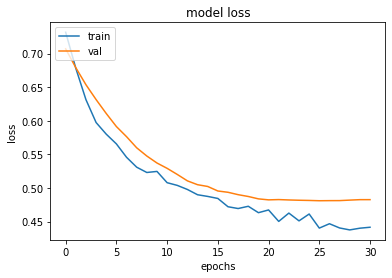

In [79]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

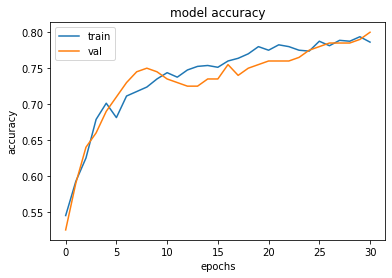

In [80]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [81]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [82]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

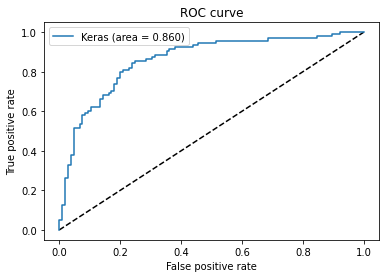

In [83]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()